### Upwind Scheme 
Solve the PDE 
$$ \frac{\partial{u}}{\partial{t}} + c \frac{\partial{u}}{\partial{x}} = 0 $$
for the boundary conditions 
$${\displaystyle \operatorname u(x, 0)={\begin{cases} 20x & 0\leq x \leq 0.05\\ 20(0.1 - x) & 0.05\leq x \leq 0.1 \\0 &\mathrm {otherwise} \end{cases}}} $$

Choose c = 1
Since we have chose $ c > 0 $ so Forward Time Forward Space Discretization is used.
$$ u^{n+1}_{j} = (1 - \nu) u_j^{n}+ \nu u_{j-1}^n \\
\mathrm{where} \: \nu = c \frac{\partial{t}}{\partial{x}} $$

In [2]:
import numpy as np 
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d
from copy import copy

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
# Initialize the solution for t = 0
def initialize(space_step):
    number = np.ceil(0.5/space_step) + 1
    u_ = 20*np.linspace(0, 0.05, number)
    u_ = u_[:-1]
    u = np.append(u_, 20*np.linspace(0.05, 0, number))
    return u

def upwind(c, u_prev, space_step, time_step):
    nu = c*(time_step/space_step)
    u = np.zeros((u_prev.shape[0]))
    u[0] = 0
    for i in range(1, u_prev.shape[0]):
        u[i] = (1 - nu)*u_prev[i] +  nu*u_prev[i-1]
#     print(u)
    return u

/Users/apple/anaconda3/envs/env-python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
/Users/apple/anaconda3/envs/env-python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/Users/apple/anaconda3/envs/env-python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


[0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384]


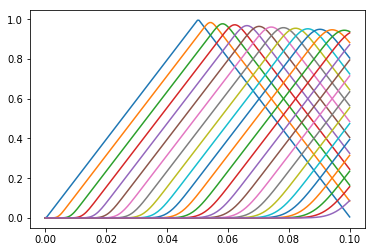

In [8]:
space_step = 0.005
time_step = 0.0025
x = np.linspace(0, 0.1, 1/space_step + 1) 
u_init = initialize(space_step)
t = 1
time_steps = int(np.ceil(t/time_step)+1)
time_step_print = [int(time_steps*i/25) for i in range(25)]
print(time_step_print)
for i in range(time_steps):
    u_new = upwind(1, u_init, space_step, time_step )
    if i in time_step_print:
        plt.plot(x, u_new)
    u_init = u_new
